In [200]:
# IMPORTANDO LIBRERIAS

import tensorflow_datasets as tfds
import math
import tensorflow as tf

In [201]:
# Cargando nuestro dataset
data, metadata = tfds.load('mnist', as_supervised=True, with_info=True)

In [202]:
# Funcion para normalizar nuestro dataset
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255 #Aqui lo pasa de 0-255 a 0-1
  return images, labels

In [203]:
# Dividimos nuestro dataset
train, test = data['train'], data['test']

In [204]:
# Guardamos los valores posibles de clasificacion
labels = metadata.features['label'].names

In [205]:
#Normalizar los datos de entrenamiento y pruebas con la funcion que hicimos
train = train.map(normalize)
test = test.map(normalize)

In [206]:
# Cargamos a memoria para mas rapidez de entrenamiento
train = train.cache()
test = test.cache()

In [207]:
# Creamos el modelo
import keras
from keras import layers
model = keras.Sequential([
    layers.Input(shape=(28,28,1)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    # 🔹 Usa 'softmax' simple, no tf.nn.softmax ni softmax_v2
    layers.Dense(10, activation='softmax')
])

In [208]:
# Compilamos el modelo
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [209]:
#Los numeros de datos en entrenamiento y pruebas (60k y 10k)
train_size = metadata.splits["train"].num_examples
test_size = metadata.splits["test"].num_examples

#El trabajo por lotes permite que entrenamientos con gran cantidad de datos se haga de manera mas eficiente
BATCH_SIZE = 32

In [210]:
#Shuffle y repeat hacen que los datos esten mezclados de manera aleatoria para que la red
#no se vaya a aprender el orden de las cosas
train = train.repeat().shuffle(train_size).batch(BATCH_SIZE)
test = test.batch(BATCH_SIZE)

In [211]:
%time history = model.fit(train, epochs=5, validation_data=test, steps_per_epoch= math.ceil(train_size/BATCH_SIZE), verbose=1 )

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.9102 - loss: 0.2912 - val_accuracy: 0.9773 - val_loss: 0.0742
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9660 - loss: 0.1155 - val_accuracy: 0.9778 - val_loss: 0.0720
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9738 - loss: 0.0860 - val_accuracy: 0.9843 - val_loss: 0.0515
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9781 - loss: 0.0718 - val_accuracy: 0.9855 - val_loss: 0.0487
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9808 - loss: 0.0626 - val_accuracy: 0.9875 - val_loss: 0.0425
CPU times: user 3min 31s, sys: 16 s, total: 3min 47s
Wall time: 1min 16s


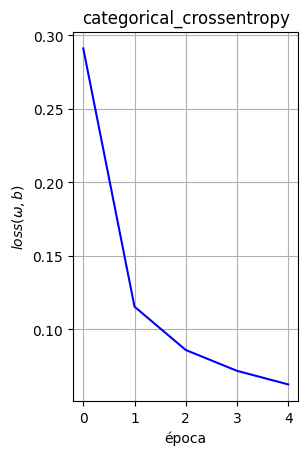

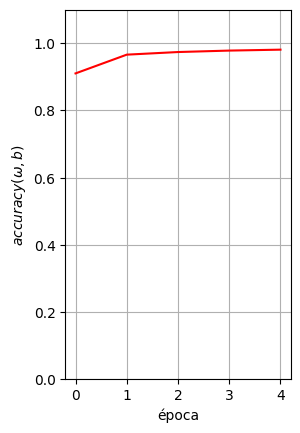

In [212]:
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plt.plot(history.epoch,history.history['loss'], 'b',label='error')
plt.title(u'categorical_crossentropy')
plt.xlabel(u'época')
plt.ylabel(r'$loss(\omega, b)$')
plt.grid(True)
#plt.legend(loc='upper right')
plt.show()

plt.subplot(1,2,2)
plt.plot(history.epoch,history.history['accuracy'], 'r',label='precisión')
#plt.title(u'categorical_crossentropy')
plt.xlabel(u'época')
plt.ylabel(r'$accuracy(\omega, b)$')
plt.ylim([0,1.1])
plt.grid(True)
#plt.legend(loc='lower right')
plt.show()

In [213]:
# Guardamos nuestro modelo
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 491,552 (1.88 MB)

 Trainable params: 163,850 (640.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 327,702 (1.25 MB)

In [214]:
# Creando una carpeta de salida
import os

if not os.path.exists("output"):
  !mkdir "output"

In [215]:
%pip install --upgrade tensorflowjs


Note: you may need to restart the kernel to use updated packages.


In [220]:
import tensorflowjs as tfjs
from tensorflow import keras

model.export("numeros_CNN_savedmodel")

# Convertir a TensorFlow.js
!tensorflowjs_converter \
    --input_format=tf_saved_model \
    numeros_CNN_savedmodel \
    ./output_tfjs


INFO:tensorflow:Assets written to: numeros_CNN_savedmodel/assets


INFO:tensorflow:Assets written to: numeros_CNN_savedmodel/assets


Saved artifact at 'numeros_CNN_savedmodel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='input_layer_10')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  139989161218592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139989159098880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139989149629808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139989149747152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139989159218512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139989159222384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139989159225200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139989158830048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139989158831280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139989158822304: TensorSpec(shape=(), dtype=tf.resource, name=None)
2025-10-1